In [1]:
import pandas as pd

from Strava.StravaData import StravaData
from Strava.StravaHeatmap import *

In [2]:
# Arguments
athlete_id = 23312763
activity_type = 'Run'   # 'Run' or 'Ride'
location = 'Cambridge'
lat_lower = 52.0
lat_upper = 52.8
long_lower = 0.06
long_upper = 0.2

In [3]:
print('Collecting the coordinates...')

strava_data = StravaData(athlete_id=athlete_id)

coordinates = []
num_activites = 0

for id in strava_data.activities.index:
    if strava_data.activities.loc[id, 'Activity Type'] == activity_type:
        file = os.path.join(strava_data.activity_folder, f"{id}.csv")
        if os.path.exists(file):
            data = pd.read_csv(file, index_col=0)
            c1 = all(data.position_lat.between(lat_lower, lat_upper))
            c2 = all(data.position_long.between(long_lower, long_upper))

            # GPS within area
            if c1 and c2:
                # print(f"Logging: Activity {id} is in {location}")
                num_activites += 1
                for index in data.index:
                    coordinates.append([float(data.loc[index, 'position_lat']),
                                        float(data.loc[index, 'position_long'])])

coordinates = np.array(coordinates)

if coordinates.size == 0:
    exit(f"Error: No data for athlete {athlete_id} for {activity_type} in location {location}")

print(f"Logging: {num_activites} activities")
print(f"Logging: {len(coordinates)} points")
print()

Logging: 79 activities
Logging: 54095 points



In [4]:
from Strava.StravaHeatmap import *

In [14]:
# Arguments
sigma_pixels = 2
use_cumululative_distribution = True
reduce_points = 100 

In [17]:
strava_heatmap = StravaHeatmap(coordinates, num_activites,
                               athlete_id=23312763, 
                               location='Cambridge', 
                               activity_type='Run',
                               sigma_pixels=sigma_pixels,
                               use_cumululative_distribution=use_cumululative_distribution,
                               reduce_points=reduce_points)

strava_heatmap.determine_tiles()
strava_heatmap.download_tiles()
strava_heatmap.create_heatmap()


Determine tiles...
Logging: 14 zoom
Logging: 72 tiles

Download tiles...

Creating heatmap...



Plotting heatmap...


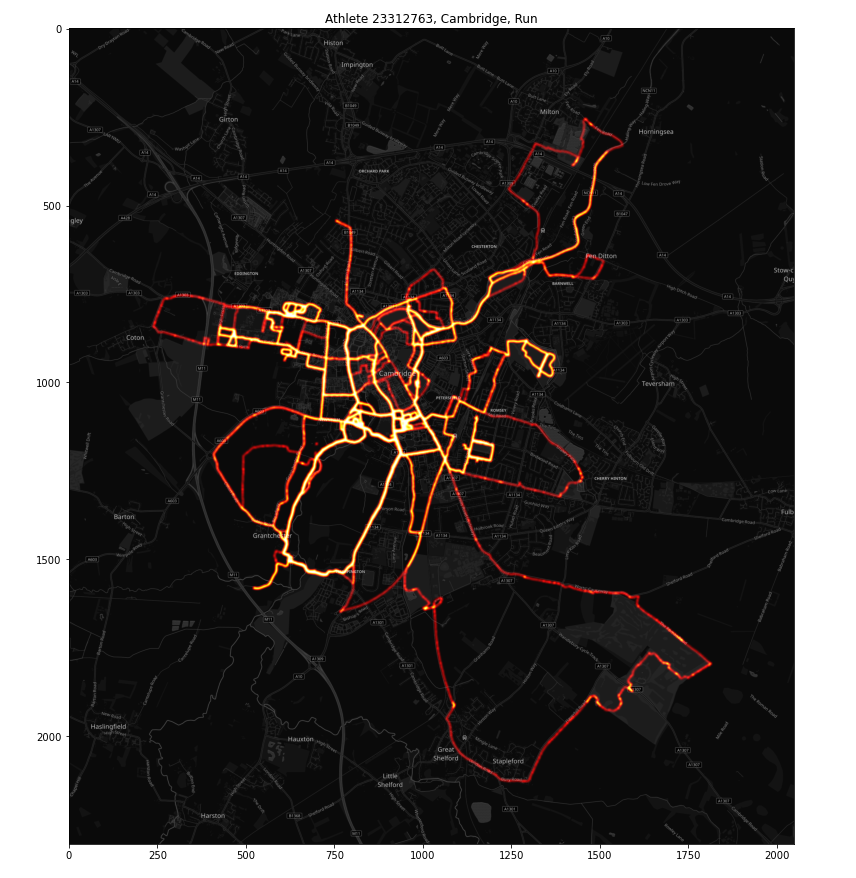

In [18]:
strava_heatmap.plot_heatmap()

In [19]:
strava_heatmap.save_heatmap()

Saving heatmap...

